# Assignment 1 - Outlier Detection

*Due: Friday, 1 December, 2023 at 14:00 CET*

For the first assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use decision tree, random forest, and isolation forest to detect an outlier class. The objectives of this assignment are:
- use the supervised classification algorithms to classify outliers in real-life data sets
- perform cross validation and fine-tune the model parameters of each algorithm
- use the unsupervised outlier detection algorithms to detect outliers in real-life data sets
- calculate model performance (e.g., accuracy, recall, precision, f1)
- design experiments to compare performance of algorithms
- reflect on the difference between different models


This assignment includes three algorithms: DT, RF, and IF. The first task is to perform data exploration. In Task 2-4, you will use the three algorithms to classify outliers, respectively. In Task 5, you will compare the algorithms and evaluate their results. Please note that Task 2-4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average validation accuracy, recall, precision, and F1 scores of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your (held-out) test data, and report the test accuracy, precision, recall, and F1. 

Note that, in Task 5, you will need all the calculated accuracy, precision, recall and F1 measures from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 




## Task 1: Exploring the data set
 
 

### Data set: Bank Marketing


Import the file *dataBank-additional-full_normalised.csv* to load the preprocessed data set. "*The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*"


Use the column "label" as the response variable. The instances labeled with 1 are the "outliers", in this case the class we would like to detect accurately; the instance labeled with 0 are the inliers. 


The original data description can be found via the link here below. You will also find some explanations regarding the features under the section "Attribute Information".  
https://archive.ics.uci.edu/ml/datasets/bank+marketing





In [2]:
# Import packages
import pandas as pd
import numpy as np

# Import data
data = pd.read_csv('dataBank-additional-full_normalised_sampled.csv', sep=',')


In [ ]:
data.info()

In [ ]:
data.describe()


### 1.1. Exploratory data analysis

For the data set, create 2-3 figures and tables that will help you understand the data. 


During the data exploration, you, as a team, are trying to get an impression about the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many instances are there in each class? Are the classes imbalanced?
- How many variables are in the data? What is the data type and the distribution of each variable? 
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)

#### Tips: 

Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*



In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [ ]:
data['class']

In [ ]:
data.columns

In [ ]:
data.describe()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### 1.2. Creating Train and Test data sets

Create a training and a held-out test data set. *Later in Task 2-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data and motivate your choice when you discuss the experiment setup in your report. 

Tips: 

*You may use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) class provided by sklearn*

In [3]:
# import method to make a train/test split
from sklearn.model_selection import train_test_split

# copy data
df = data.copy()

# create X and y
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']
X = df[features]
y = df['class']



# TODO: create training data and held-out test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [ ]:
df['class']

In [ ]:
k_best = SelectKBest(f_classif)
X_new = k_best.fit_transform(X, y)
selected_features_indices = k_best.get_support(indices=True)

In [ ]:
selected_feature_names = X.columns[selected_features_indices]

In [ ]:
fig = px.bar(x=selected_feature_names, y=k_best.scores_[selected_features_indices], title='Feature Importance Scores')
fig.update_layout(xaxis_title='Features', yaxis_title='Importance Score')
fig.show()

## Task 2: Decision Trees 
### - Outlier Detection as a Supervised Classification

### 2.1 Training a Decision Tree

Use the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn to learn a decision tree model by fitting the full training data.

Show/plot the tree diagram and also plot the feature importances. 
What do you observe?


#### Tips:

To show the tree diagram, you may use the graphviz library or use the plot_tree function, see https://scikit-learn.org/stable/modules/tree.html




In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# learn a decision tree using default parameters
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)

# plot the tree
tree.plot_tree(cl)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# TODO: plot the feature importances
importances = cl.feature_importances_
feature_names = [i for i in range(X.shape[1])]
tree_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
X.columns[[0, 50, 51, 59, 60, 61]]

### 2.2 Confusion Matrix and Accuracy

Compute the *confusion matrix* and *accuracy* of the tree using the held-out data set. Moreover, also compute the *recall*, *precision*, and *F1-score* of the tree. 


For this part, you can either implement your own functions or use the following scikit-learn libraries.  
- [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)


Reflect on the performance of the model and be aware of the difference between *accuracy* and *F1-score*. How good is this decision tree model for outlier detection?

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# use the model to make predictions for the test data set
y_pred = cl.predict(X_test)

# TODO: compute accuracy, recall, precision, and f1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision:{precision}\nF1: {f1}")
print(report)


### 2.3 Features to Tree  (optional)

Use the training data to re-fit a new decision tree with the parameter max_depth set to 4. Show the tree diagram and also plot the feature importances. 

Recalculate the performance of this simpler model. 

What do you observe?


In [ ]:
# TODO: learn a decision tree with maximal depth 4
d4_tree = DecisionTreeClassifier(max_depth=4)
d4_tree.fit(X_train, y_train)

# TODO: plot the tree
tree.plot_tree(d4_tree)


In [ ]:
# use the model to make predictions for the test data set
y_pred_d4 = d4_tree.predict(X_test)

# TODO: compute accuracy, recall, precision, and f1 score
accuracy = accuracy_score(y_test, y_pred_d4)
recall = recall_score(y_test, y_pred_d4)
precision = precision_score(y_test, y_pred_d4)
f1 = f1_score(y_test, y_pred_d4)
report = classification_report(y_test, y_pred_d4)
conf_matrix = confusion_matrix(y_test, y_pred_d4)

print(conf_matrix)
print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision:{precision}\nF1: {f1}")
print(report)


### 2.4 Cross validation (optional)

The code example shown here below uses the [kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) method to implement 5-fold cross-validation. Moreover, it uses the cross validation to explore how the max_depth influences the model performance. It keeps track of the validation accuracy scores and F1-scores across the 5 folds. 


Now, change the code to also compute the recall and precision. 


In [ ]:
from sklearn.model_selection import KFold

# create 5-fold cross-validation
nk = 5
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Search the parameter among the following
C = np.arange(2, 10,)


# init acc
acc = np.zeros((nk , 8))
# init f1
f1 = np.zeros((nk , 8))
i = 0
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = c)
        dt.fit(X_t, y_t)
        yhat = dt.predict(X_val)
        acc[i][j] = accuracy_score(yhat , y_val)
        f1[i][j] = f1_score(yhat , y_val)
        j += 1
    i += 1
    
print('Mean accuracy: ' + str(np.mean(acc , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc , axis = 0))))

print('Mean F1: ' + str(np.mean(f1 , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(f1 , axis = 0))))

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create 5-fold cross-validation
nk = 5
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Define the search space for parameters
param_space = {'n_estimators': [10, 50, 100, 200], 'max_features': [None, 'sqrt', 'log2']}

# Initialize accuracy and F1 arrays
acc = np.zeros((nk, len(param_space['n_estimators']), len(param_space['max_features'])))
f1 = np.zeros((nk, len(param_space['n_estimators']), len(param_space['max_features'])))

i = 0
for train_index, val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    j = 0
    for n_estimators in param_space['n_estimators']:
        for max_features in param_space['max_features']:
            # Create a Random Forest model
            rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=0)
            rf.fit(X_t, y_t)
            yhat = rf.predict(X_val)

            # Compute accuracy and F1 score
            acc[i, j // len(param_space['max_features']), j % len(param_space['max_features'])] = accuracy_score(yhat, y_val)
            f1[i, j // len(param_space['max_features']), j % len(param_space['max_features'])] = f1_score(yhat, y_val)

            j += 1
    i += 1

# Compute mean accuracy and F1 score across folds
mean_acc = np.mean(acc, axis=0)
mean_f1 = np.mean(f1, axis=0)

# Find the best parameters based on mean accuracy
best_params_acc = np.unravel_index(np.argmax(mean_acc), mean_acc.shape)
best_n_estimators_acc = param_space['n_estimators'][best_params_acc[0]]
best_max_features_acc = param_space['max_features'][best_params_acc[1]]

# Find the best parameters based on mean F1 score
best_params_f1 = np.unravel_index(np.argmax(mean_f1), mean_f1.shape)
best_n_estimators_f1 = param_space['n_estimators'][best_params_f1[0]]
best_max_features_f1 = param_space['max_features'][best_params_f1[1]]

# Train the best-performing model on the full training set
best_rf_acc = RandomForestClassifier(n_estimators=best_n_estimators_acc, max_features=best_max_features_acc, random_state=0)
best_rf_acc.fit(X_train, y_train)

# Evaluate the model on the held-out test data
y_pred_test_acc = best_rf_acc.predict(X_test)
acc_test = accuracy_score(y_pred_test_acc, y_test)
f1_test = f1_score(y_pred_test_acc, y_test)

print('Mean accuracy: ', mean_acc)
print('Best parameters based on accuracy - n_estimators:', best_n_estimators_acc, ', max_features:', best_max_features_acc)
print('Mean F1: ', mean_f1)
print('Best parameters based on F1 score - n_estimators:', best_n_estimators_f1, ', max_features:', best_max_features_f1)
print('Test accuracy of the best model: ', acc_test)
print('Test F1 score of the best model: ', f1_test)


### 2.5 Tree Tuning



The built-in decision tree algorithm you are using has several parameters which you can tune (e.g., *max_depth* and *min_samples_leaf*). Use 5-fold cross-validation (e.g., reuse the code of task 2.4 and adapt the code for two parameters), show how the choice of these parameters affects performance. 


#### Tips: 
Make a decision on the range of values that you would try for the two parameters and discuss your choice in the experiment setup section.

Here is a guide that helps you to build the experiment.
First, reuse the code of task 2.4 and show how max_depth affects train and **validation accuracy**. On a single axis, plot train and **validation accuracy** as a function of max_depth. Use a red line to show validation accuracy and a blue line to show train accuracy. (Do not use your (held-out) **test data** yet). 

Second, show how validation accuracy relates to both max_depth and min_samples_leaf. Specifically, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest F1 score? How sensitive are the results to these two parameters? 

Finally, select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data -- how does it compare to the cross-validated F1 score?


In [ ]:
# TODO: create 5-fold cross-validation

# TODO: set the search space of the parameters

# TODO: learn an optimal decision tree model

# TODO: create 2D (or 3D) plot that shows how the selected parameters affect the performance. 

# TODO: compute the performance of the model on your held-out test data


## Task 3. Random Forest
### - Outlier Detection as a Supervised Classification

Now use a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the labels for the data set. 

i) use the default values for the parameters to get a RF model running. 

ii) use 5-fold cross-validation to determine a possibly better choice for the parameter *n_estimators* and *max_features*
    
iii) select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data ?

In the report, reflect on how does the test performance of RF compare to the decision tree performance? 
 



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# TODO: create 5-fold cross-validation

# TODO: set the search space of the parameters

# TODO: learn an optimal random forest model

# TODO: compute the performance of the model on your held-out test data


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# i) Fit a Random Forest model with default parameters
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X, y)

# ii) Use 5-fold cross-validation to find the best values for n_estimators and max_features
param_grid = {
    'n_estimators': [50, 100, 200],  # Add more values as needed
    'max_features': ['auto', 'sqrt', 'log2']  # Add more values as needed
}

rf_cv = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_cv, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# iii) Select the best-performing decision tree and report its performance on the test data
best_rf = grid_search.best_estimator_

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best Random Forest model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Report the accuracy of the best Random Forest model on the test set
test_accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the Best Random Forest Model: {test_accuracy_rf}")

# Compare with the performance of a single Decision Tree
# Create and train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the test set using the Decision Tree model
y_pred_dt = dt.predict(X_test)

# Report the accuracy of the Decision Tree model on the test set
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy of the Decision Tree Model: {test_accuracy_dt}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the results from the grid search
cv_results = grid_search.cv_results_
mean_cv_scores = np.array(cv_results['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_features']))

# Create a heatmap for cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(mean_cv_scores, interpolation='nearest', cmap=plt.cm.YlGnBu)
plt.title('Cross-validation accuracy')
plt.xlabel('max_features')
plt.ylabel('n_estimators')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['max_features'])), param_grid['max_features'], rotation=45)
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.tight_layout()

# Create a line plot for test accuracy over time
plt.subplot(1, 2, 2)
n_estimators_values = [params['n_estimators'] for params in cv_results['params']]
test_scores = cv_results['mean_test_score']

plt.plot(n_estimators_values, test_scores, marker='o')
plt.title('Test accuracy vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Test accuracy')
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, fbeta_score
import matplotlib.pyplot as plt

# Assuming X and y are your features and labels
# X = ...
# y = ...

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Split', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Confusion Matrix'])

# Define the test sizes and number of folds
test_sizes = [0.2, 0.3]
k = 5

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation for different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=5)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=k, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Use the best parameters to train the Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_features=best_params['max_features'])
    rf_classifier.fit(X_train, y_train)

    # Predict on the test set
    predictions = rf_classifier.predict(X_test)

    # Calculate evaluation metrics for the test set
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    confusion = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    fbeta = fbeta_score(y_test, predictions, beta=1.5)

    # Store the results in the DataFrame
    results_df = pd.concat([results_df, pd.Series({
        'Split': f'Test Size {test_size}',
        'Classifier': 'Random Forest',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'F-beta Score': fbeta
    })], ignore_index=True)

# Display or use the results as needed
print(results_df)


## Task 4. Isolation Forest

### 4.1 Apply Isolation Forest
### - Outlier Detection as an Unsupervised Classification

Use the [Isolation Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) to detect potential outliers in the data set. 

Select two parameters that you would like to investigate (for example, contamination, max_depth, n_estimators, max_samples). For each configuration: 

i) Apply Isolation Forest on the full data set (without using the labels Y)


ii) Use the labels to compute the accuracy, recall, precision, and F1-score on the full data set (using the labels). 


Compare the performance of Isolation Forest of different configurations. 


#### Tips:

- Note that the fit(X) function of the Isolation Forest does not use the labels. 


- **Look carefully at the values that an Isolation Forest classifier returns. Which value represents the outlier class? Be aware that you need to implement a mapping function f(x) that remaps -1 to 1 and 1 to 0, in order to transform the predictions such that the semantics are consistant with the previous classification algorithms.**


- Create 2D (or 3D) plots to visualize your results



In [ ]:
def get_parameter_values(results, parameter_name):
    return [result['params'][parameter_name] for result in results]


In [ ]:
def plot_results(parameter_values, accuracy_values, parameter_name):
    plt.scatter(parameter_values, accuracy_values)
    plt.xlabel(parameter_name.capitalize())
    plt.ylabel('Accuracy')
    plt.title('Isolation Forest Performance')
    plt.show()

In [ ]:
# TODO: set the search space of the parameters
# TODO: apply the configured Isolation Forest model on the test set. 
# TODO: compute the performance of the model
# TODO: return the optimal Isolation Forest model

In [15]:
random_seed = 0
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import KFold, GridSearchCV
import joblib

# Create scoring metrics and set zero_division parameter to 1 to avoid division by zero errors
precision_scorer = make_scorer(precision_score, average='weighted', zero_division=1)
recall_scorer = make_scorer(recall_score, average='weighted', zero_division=1)
f1_scorer = make_scorer(f1_score, average='weighted', zero_division=1)

In [22]:
# Set up isolation forest parameters and grid search
param_grid = {
    'contamination': [0.01, 0.05, 0.1, 0.15],
    'max_samples': [50, 100, 200],
    'max_features': [0.1, 0.5, 0.7, 1.0],
    'n_estimators': [50, 100, 200],
}

iforest = IsolationForest(random_state=random_seed)
k_fold = KFold(n_splits=5, shuffle=True, random_state=random_seed)
scoring_dict = {'accuracy': 'accuracy', 'precision': precision_scorer, 'recall': recall_scorer, 'f1_score': f1_scorer}

# Perform grid search
iforest_best = GridSearchCV(iforest, param_grid=param_grid, scoring=scoring_dict, cv=k_fold, refit='f1_score')
iforest_best.fit(X)

# Save the best model to disk
joblib.dump(iforest_best.best_estimator_, 'best_iforest_model.pkl')

# Print the best parameters and corresponding F1 score
print("Best Parameters:", iforest_best.best_params_)
print("Best F1 Score:", iforest_best.best_score_)

/Users/macsuperior/.pyenv/versions/3.11.4/envs/DA-PA/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/macsuperior/.pyenv/versions/3.11.4/envs/DA-PA/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
TypeError: _PredictScorer._score() missing 1 required positional argument: 'y_true'


/Users/macsuperior/.pyenv/versions/3.11.4/envs/DA-PA/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/macsuperior/.pyenv/versions/3.11.4/envs/DA-PA/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scor

Best Parameters: {'contamination': 0.01, 'max_features': 0.1, 'max_samples': 50, 'n_estimators': 50}
Best F1 Score: nan


In [ ]:
import joblib


In [23]:
iforest_best = joblib.load('best_iforest_model.pkl')
y_pred_iforest_best = iforest_best.predict(X)


In [14]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn import tree
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
# Mapping function
def map_iforest_predictions(pred):
    return 1 if pred == -1 else 0

# Apply mapping to predictions
y_pred_mapped = [map_iforest_predictions(pred) for pred in y_pred_iforest_best]


In [16]:
precision = precision_score(y, y_pred_mapped, average='weighted', zero_division=1)
recall = recall_score(y, y_pred_mapped, average='weighted', zero_division=1)
f1 = f1_score(y, y_pred_mapped, average='weighted', zero_division=1)

In [17]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8613592814792584
Recall: 0.8972827709764108
F1 Score: 0.857546939901143


In [18]:
results = {'true_labels': y, 'mapped_predictions': y_pred_mapped}

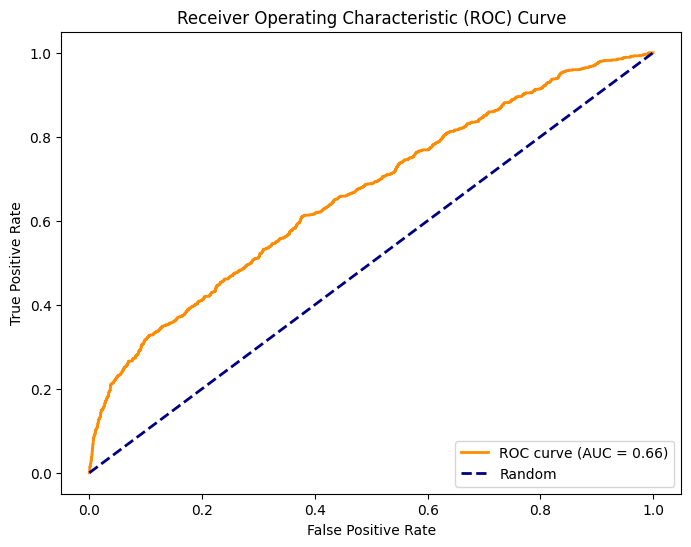

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

y_true = results['true_labels']
y_pred_iforest = results['mapped_predictions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

best_iforest_estimator = iforest_best
best_iforest_estimator.fit(X_train)

# Obtain decision function scores (anomaly scores) for the test set
iforest_scores = best_iforest_estimator.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, -iforest_scores)  # '-' because IsolationForest returns negative scores

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### 4.2 Outlier Detection - Analyze Outliers

Taking the best performing Isolation Forest model from Task 4.1, enrich the data set with the predicted labels (or scores) by the model. 

Perform one or two analyses to show the characteristics of the outliers. 

              age  job=housemaid  job=services  job=admin.  job=blue-collar  \
count  402.000000     402.000000    402.000000  402.000000       402.000000   
mean     0.338370       0.032338      0.179104    0.208955         0.064677   
std      0.207549       0.177117      0.383918    0.407069         0.246261   
min      0.000000       0.000000      0.000000    0.000000         0.000000   
25%      0.160494       0.000000      0.000000    0.000000         0.000000   
50%      0.296296       0.000000      0.000000    0.000000         0.000000   
75%      0.456790       0.000000      0.000000    0.000000         0.000000   
max      0.925926       1.000000      1.000000    1.000000         1.000000   

       job=technician  job=retired  job=management  job=unemployed  \
count      402.000000   402.000000      402.000000      402.000000   
mean         0.151741     0.114428        0.089552        0.027363   
std          0.359217     0.318727        0.285895        0.163343   
min     

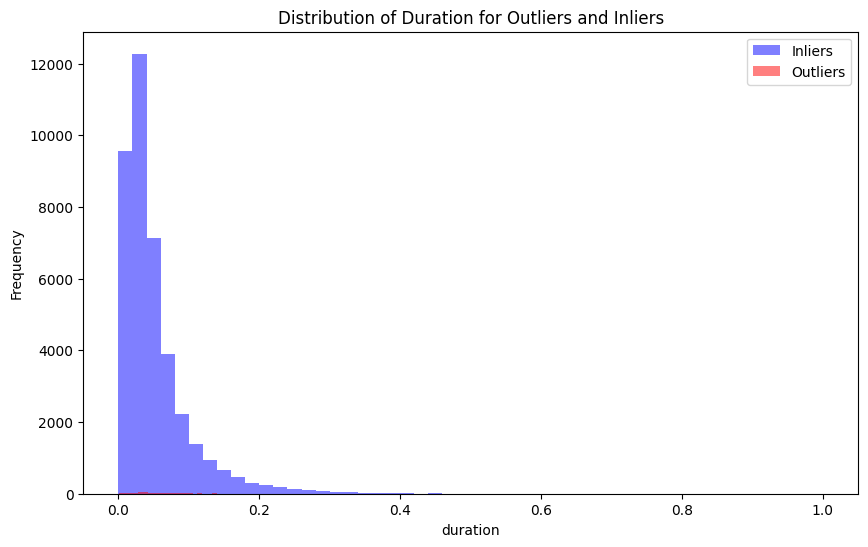

In [30]:
import pandas as pd

# Load the original dataset
data = pd.read_csv('dataBank-additional-full_normalised_sampled.csv', sep=',')
df = data.copy()

# Assuming 'results' dictionary contains mapped predictions
y_pred_mapped = results['mapped_predictions']

# Add predicted labels to the original dataset
df['is_outlier'] = y_pred_mapped

# Separate the data into outliers and inliers
outliers = df[df['is_outlier'] == 1]
inliers = df[df['is_outlier'] == 0]
# Analysis 1: Summary statistics for numerical features
outliers_stats = outliers.describe()
inliers_stats = inliers.describe()
print(outliers_stats)
print(inliers_stats)

# Analysis 2: Distribution of a specific feature for outliers and inliers
feature_to_analyze = 'duration'

plt.figure(figsize=(10, 6))
plt.hist(inliers[feature_to_analyze], bins=50, alpha=0.5, label='Inliers', color='blue')
plt.hist(outliers[feature_to_analyze], bins=50, alpha=0.5, label='Outliers', color='red')
plt.xlabel(feature_to_analyze)
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Duration for Outliers and Inliers')
plt.show()


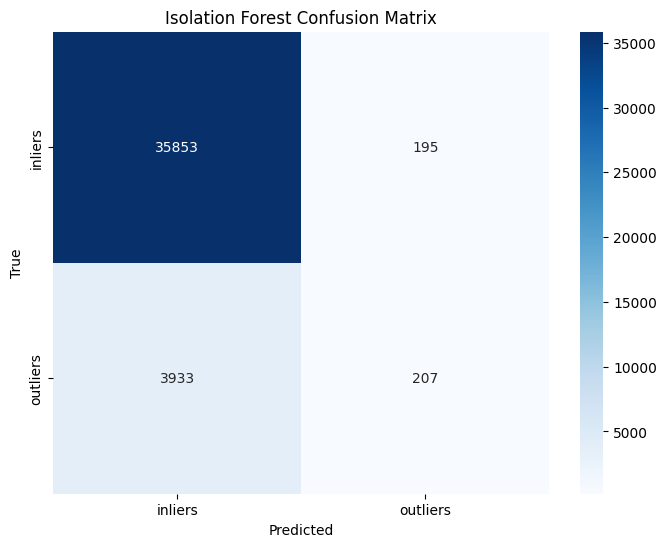

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the best Isolation Forest model from Task 4.1
best_iforest_model = joblib.load('best_iforest_model.pkl')

# Enrich the dataset with predicted labels
y_pred_iforest = best_iforest_model.predict(X)

y_pred_mapped = [1 if pred == -1 else 0 for pred in y_pred_iforest]

# Visualization 1: Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_mapped)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["inliers", "outliers"],
            yticklabels=["inliers", "outliers"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Isolation Forest Confusion Matrix')
plt.show()


## Task 5. Report your results and discuss your findings

### 5.1 Compare the performances 

By now, you have applied three algorithms with different parameters on the data set. For each algorithm, you have create tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that show the optimal performance of each algorithm on the data set, for example see the table here below. 

Discuss your findings in the report and reflect on the following questions:
- According to the performance results, which one is the optimal model? 
- How large is the difference between the accuracy score and the F1 score for each model? What caused the difference?
- Which of performance measures (the accuracy score, recall, precision, or F1-score) would you use for comparing the model performance? Why?
- You are comparing the performance of supervised algorithms (DT and RF) with an unsupervised algorithm (Isolation Forest). Is this a fair comparison? Motivate your answer. 



| Model | Validation Accuracy  | Test Accuracy |  Validation Recall  |  Test Recall  | Validation F1 | Test F1 |... |
|------|------|------|------|------|------|------|-----|
|   Decision Tree        |  |  | | | | |
|   Random Forest  |  |  | || | |
|   Isolation Forest        |  |  | || | |



### 5.2 Analyze and discuss the results

For each optimal model, enrich your test set by adding the predicted labels by this model to the test set. Can you think of an analysis that gives insights into when the model performs poorly?

Discuss the analysis and insights in the report

## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 0.5 extra point. 

### Bonus Task 1

Implement another outlier detection algorithm (for example, LOF, OC-SVM) or design your own outlier detection algorithm that achieves a better F1 score. 




In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

### Bonus Task 2 

Implement techniques (e.g., preprocessing, feature engineering, sampling) that help improve the F1 scores of existing models


### Prediction Challenge 

- Import the independent test set without labels, apply your best performing model on this test set. 

- Enrich the test set with the predicted labels (**name this column 'predictedClass'**) 

- Export both the model as pkl file and the enriched test data set as a csv file. 

- The top three teams that have achieved the best accuracy score wins max. 0.3 bonus points.




In [ ]:
# import pickle

# import data
data_challenge = pd.read_csv('./dataBank-new_test_nolabel.csv', sep=',')
X_new = data_challenge[features]
print(X_new.describe())

# TODO: assign optimal model 
optimal_model = ...

yhat = optimal_model.predict(X_new)

# TODO: enrich the data with the predicted labels by adding the column 'predictedClass'

# TODO: export the enriched data to disk


# export the model to disk
modelfilename = 'Team_x_optimal_model.sav'
pickle.dump(optimal_model, open(modelfilename, 'wb'))



